In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Load the Data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  
from collections import Counter

import string

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import wordnet,stopwords

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder

from wordcloud import WordCloud

from xgboost import XGBClassifier

import tensorflow as tf

from warnings import simplefilter
simplefilter("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) 

In [2]:
pd.set_option('display.max_colwidth', None)
df= pd.read_csv("/kaggle/input/bbc-articles-dataset/bbc_text_cls.csv")

In [3]:
df.head()

,text,labels
0,"Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existing customers for high-speed broadband. TimeWarner also has to restate 2000 and 2003 results following a probe by the US Securities Exchange Commission (SEC), which is close to concluding.\n\nTime Warner's fourth quarter profits were slightly better than analysts' expectations. But its film division saw profits slump 27% to $284m, helped by box-office flops Alexander and Catwoman, a sharp contrast to year-earlier, when the third and final film in the Lord of the Rings trilogy boosted results. For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn. ""Our financial performance was strong, meeting or exceeding all of our full-year objectives and greatly enhancing our flexibility,"" chairman and chief executive Richard Parsons said. For 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins.\n\nTimeWarner is to restate its accounts as part of efforts to resolve an inquiry into AOL by US market regulators. It has already offered to pay $300m to settle charges, in a deal that is under review by the SEC. The company said it was unable to estimate the amount it needed to set aside for legal reserves, which it previously set at $500m. It intends to adjust the way it accounts for a deal with German music publisher Bertelsmann's purchase of a stake in AOL Europe, which it had reported as advertising revenue. It will now book the sale of its stake in AOL Europe as a loss on the value of that stake.",business
1,"Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.\n\nAnd Alan Greenspan highlighted the US government's willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 against the euro, from $1.2974 on Thursday. Market concerns about the deficit has hit the greenback in recent months. On Friday, Federal Reserve chairman Mr Greenspan's speech in London ahead of the meeting of G7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected US jobs data. ""I think the chairman's taking a much more sanguine view on the current account deficit than he's taken for some time,"" said Robert Sinche, head of currency strategy at Bank of America in New York. ""He's taking a longer-term view, laying out a set of conditions under which the current account deficit can improve this year and next.""\n\nWorries about the deficit concerns about China do, however, remain. China's currency remains pegged to the dollar and the US currency's sharp falls in recent months have therefore made Chinese export prices highly competitive. But calls for a shift in Beijing's policy have fallen on deaf ears, despite recent comments in a maj

In [4]:
inputs = df['text']
labels = df['labels']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(inputs, labels, random_state=42)

In [6]:
X_train.shape

(1668,)

In [7]:
X_test.shape

(557,)

In [8]:
y_train.shape

(1668,)

In [9]:
y_test.shape

(557,)

In [11]:
print(f'Null values in X_test: {X_test.isna().sum()}; null values in y_test: {y_test.isna().sum()}\n')

print(f'Dupicate values in X_test: {X_test.duplicated().sum()}')

Null values in X_test: 0; null values in y_test: 0

Dupicate values in X_test: 5


In [12]:
print(f'Null values in X_test: {X_train.isna().sum()}; null values in y_test: {y_train.isna().sum()}\n')

print(f'Dupicate values in X_train: {X_train.duplicated().sum()}')

Null values in X_test: 0; null values in y_test: 0

Dupicate values in X_train: 57


# Exploratory Data Analysis

* Text

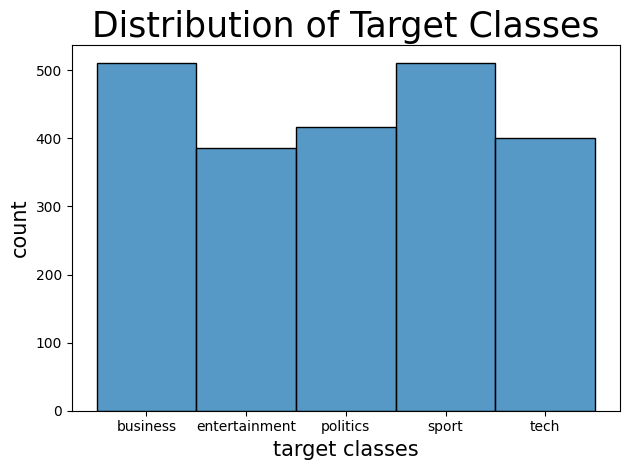

In [13]:
sns.histplot(data=labels)

plt.title('Distribution of Target Classes',fontsize=25)
plt.xlabel('target classes',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.tight_layout()

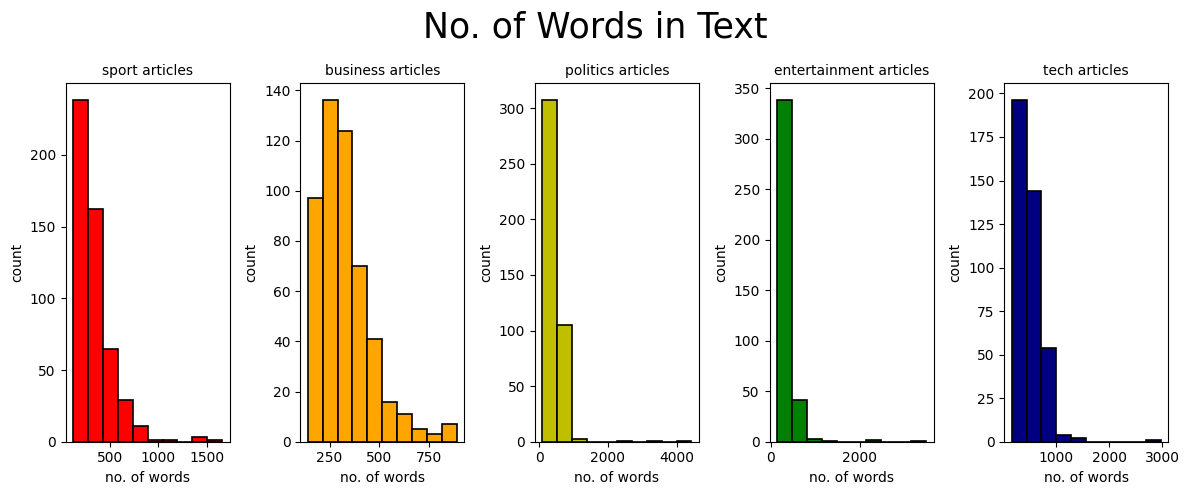

In [14]:
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(ncols=5,figsize=(12,5))

wd_len_sp = df[df['labels']=='sport']['text'].str.split().map(lambda x: len(x))
ax1.hist(wd_len_sp,color='red',edgecolor='black',linewidth=1.2)
ax1.set_title('sport articles',size=10)
ax1.set_xlabel('no. of words',size=10)
ax1.set_ylabel('count',size=10)

wd_len_bus = df[df['labels']=='business']['text'].str.split().map(lambda x: len(x))
ax2.hist(wd_len_bus,color='orange',edgecolor='black',linewidth=1.2)
ax2.set_title('business articles',size=10)
ax2.set_xlabel('no. of words',size=10)
ax2.set_ylabel('count',size=10)

wd_len_pol = df[df['labels']=='politics']['text'].str.split().map(lambda x: len(x))
ax3.hist(wd_len_pol,color='y',edgecolor='black',linewidth=1.2)
ax3.set_title('politics articles',size=10)
ax3.set_xlabel('no. of words',size=10)
ax3.set_ylabel('count',size=10)

wd_len_ent = df[df['labels']=='entertainment']['text'].str.split().map(lambda x: len(x))
ax4.hist(wd_len_ent,color='g',edgecolor='black',linewidth=1.2)
ax4.set_title('entertainment articles',size=10)
ax4.set_xlabel('no. of words',size=10)
ax4.set_ylabel('count',size=10)

wd_len_te = df[df['labels']=='tech']['text'].str.split().map(lambda x: len(x))
ax5.hist(wd_len_te,color='navy',edgecolor='black',linewidth=1.2)
ax5.set_title('tech articles',size=10)
ax5.set_xlabel('no. of words',size=10)
ax5.set_ylabel('count',size=10)

plt.suptitle("No. of Words in Text",size=25)
plt.tight_layout()
plt.show()

In [16]:
print(f'mean no. of words in sport articles: {wd_len_sp.mean():.1f}')
print(f'mean no. of words in business articles: {wd_len_bus.mean():.1f}')
print(f'mean no. of words in politics articles: {wd_len_pol.mean():.1f}')
print(f'mean no. of words in entertainment articles: {wd_len_ent.mean():.1f}')
print(f'mean no. of words in tech articles: {wd_len_te.mean():.1f}')

mean no. of words in sport articles: 329.3
mean no. of words in business articles: 328.9
mean no. of words in politics articles: 454.0
mean no. of words in entertainment articles: 330.6
mean no. of words in tech articles: 502.7


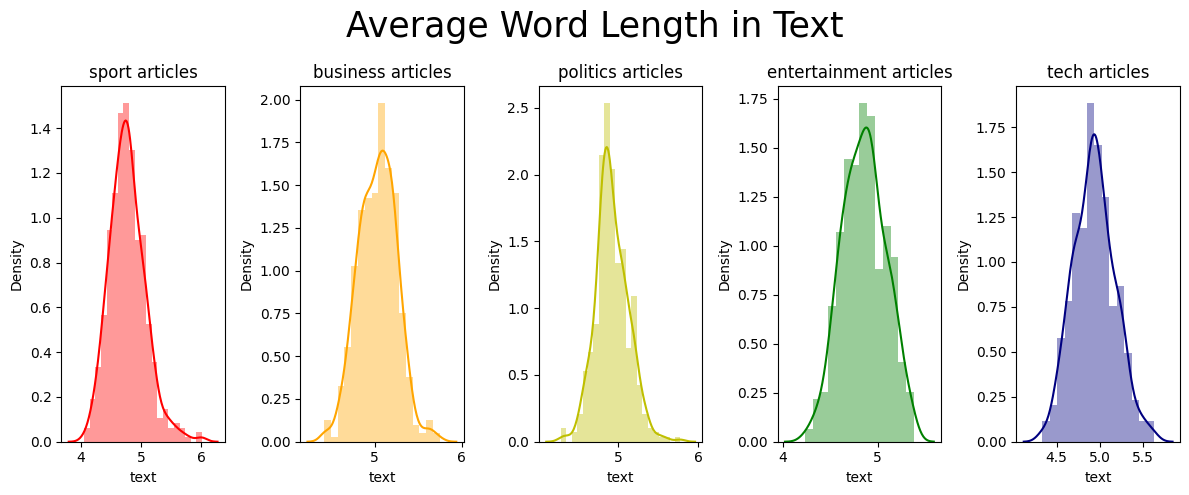

In [17]:
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(ncols=5,figsize=(12,5))

char_len_sp = df[df['labels']=='sport']['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(char_len_sp.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('sport articles',size=12)

char_len_bus = df[df['labels']=='business']['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(char_len_bus.map(lambda x: np.mean(x)),ax=ax2,color='orange')
ax2.set_title('business articles',size=12)     

char_len_pol = df[df['labels']=='politics']['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(char_len_pol.map(lambda x: np.mean(x)),ax=ax3,color='y')
ax3.set_title('politics articles',size=12) 

char_len_ent = df[df['labels']=='entertainment']['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(char_len_ent.map(lambda x: np.mean(x)),ax=ax4,color='g')
ax4.set_title('entertainment articles',size=12)

char_len_te = df[df['labels']=='tech']['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(char_len_te.map(lambda x: np.mean(x)),ax=ax5,color='navy')
ax5.set_title('tech articles',size=12)

plt.suptitle("Average Word Length in Text",size=25)
plt.tight_layout()
plt.show()

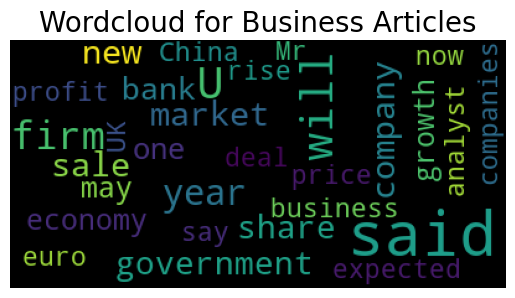

In [18]:
text = ' '.join(df[df['labels']=='business']['text'])
wordcloud = WordCloud(max_font_size=50,max_words=30).generate(text)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Wordcloud for Business Articles",fontsize=20)
plt.show()

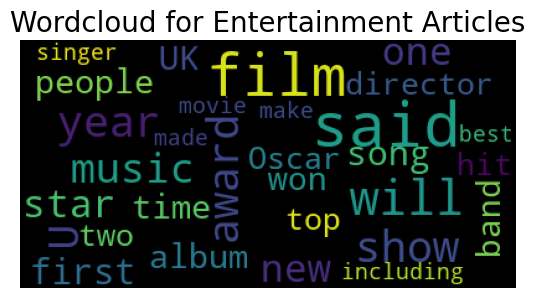

In [19]:
text = ' '.join(df[df['labels']=='entertainment']['text'])
wordcloud = WordCloud(max_font_size=50,max_words=30).generate(text)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Wordcloud for Entertainment Articles",fontsize=20)
plt.show()

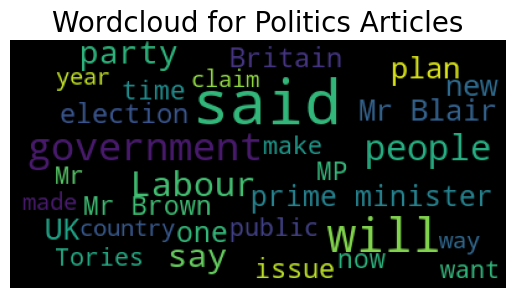

In [20]:
text = ' '.join(df[df['labels']=='politics']['text'])
wordcloud = WordCloud(max_font_size=50,max_words=30).generate(text)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Wordcloud for Politics Articles",fontsize=20)
plt.show()

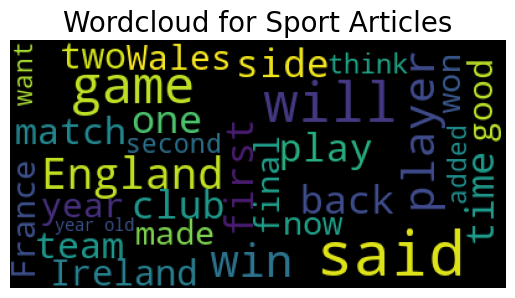

In [21]:
text = ' '.join(df[df['labels']=='sport']['text'])
wordcloud = WordCloud(max_font_size=50,max_words=30).generate(text)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Wordcloud for Sport Articles",fontsize=20)
plt.show()

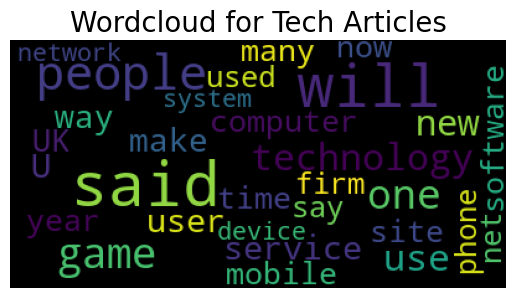

In [22]:
text = ' '.join(df[df['labels']=='tech']['text'])
wordcloud = WordCloud(max_font_size=50,max_words=30).generate(text)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Wordcloud for Tech Articles",fontsize=20)
plt.show()

In [23]:
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [24]:
vectorizer = CountVectorizer()

X_train2 = vectorizer.fit_transform(X_train)
X_test2  = vectorizer.transform(X_test)

In [25]:
def get_test_scores(model_name:str,preds,y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy  = accuracy_score(y_test_data,preds)
    precision = precision_score(y_test_data,preds,average='macro')
    recall    = recall_score(y_test_data,preds,average='macro')
    f1        = f1_score(y_test_data,preds,average='macro')

    table = pd.DataFrame({'model': [model_name],'precision': [precision],'recall': [recall],
                          'F1': [f1],'accuracy': [accuracy]})

    return table 

In [29]:
MNB = MultinomialNB()
MNB.fit(X_train2,y_train)

MNB_train_preds = MNB.predict(X_train2)

MNB_train_results = get_test_scores('MNBB (train)',MNB_train_preds,y_train)
MNB_train_results

,model,precision,recall,F1,accuracy
0,MNBB (train),0.994718,0.995162,0.99492,0.995204


In [30]:
MNB_test_preds = MNB.predict(X_test2)

MNB_test_results = get_test_scores('MNBB (test)',MNB_test_preds,y_test)
MNB_test_results

,model,precision,recall,F1,accuracy
0,MNBB (test),0.970711,0.972471,0.971398,0.971275


In [27]:
unique, counts = np.unique(y_test, return_counts=True)

print(np.asarray((unique, counts)).T)

[['business' 142]
 ['entertainment' 94]
 ['politics' 95]
 ['sport' 122]
 ['tech' 104]]


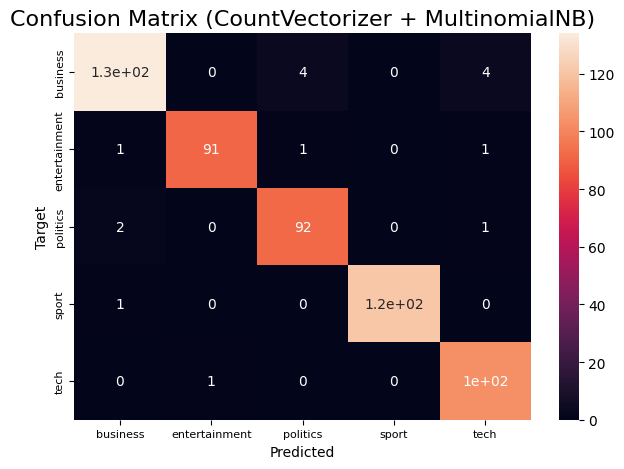

In [31]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test,MNB_test_preds,labels=MNB.classes_)

ax = sns.heatmap(cm,annot=True)
ax.set_title('Confusion Matrix (CountVectorizer + MultinomialNB)',fontsize=16)
ax.xaxis.set_ticklabels(['business','entertainment','politics','sport','tech'],fontsize=8) 
ax.yaxis.set_ticklabels(['business','entertainment','politics','sport','tech'],fontsize=8) 
ax.set_xlabel("Predicted")
ax.set_ylabel("Target")

plt.tight_layout()

In [33]:
vectorizer = CountVectorizer(stop_words='english',analyzer='word')

X_train2 = vectorizer.fit_transform(X_train)
X_test2  = vectorizer.transform(X_test)

MNB = MultinomialNB()
MNB.fit(X_train2,y_train)

MNB_train_preds2 = MNB.predict(X_train2)

MNB_train_results2 = get_test_scores('MNBB (train, no stopwords)',MNB_train_preds2,y_train)
MNB_train_results2

,model,precision,recall,F1,accuracy
0,"MNBB (train, no stopwords)",0.995993,0.99639,0.996179,0.996403


In [34]:
MNB_test_preds2 = MNB.predict(X_test2)

MNB_test_results2 = get_test_scores('MNBB (test, no stopwords)',MNB_test_preds2,y_test)
MNB_test_results2

,model,precision,recall,F1,accuracy
0,"MNBB (test, no stopwords)",0.970711,0.972471,0.971398,0.971275


In [35]:
X_train = X_train.str.replace('\n', ' ')
X_test = X_test.str.replace('\n', ' ')

In [36]:
punct = "\n\r"+string.punctuation
X_train = X_train.str.translate(str.maketrans('','',punct))
X_test  = X_test.str.translate(str.maketrans('','',punct))

In [37]:
X_train = X_train.apply(lambda x: x.lower())
X_test  = X_test.apply(lambda x: x.lower())

X_train.head(21)

447                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [38]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

X_train3 = tfidf_vectorizer.fit_transform(X_train)
X_test3  = tfidf_vectorizer.transform(X_test)

In [39]:
encoder = LabelEncoder()

y_train = encoder.fit_transform(y_train) 
y_test  = encoder.fit_transform(y_test)

In [40]:
xgb = XGBClassifier(objective='binary:logistic',random_state=42)

xgb.fit(X_train3,y_train)

# Use the model to predict on train data
xgb_train_preds = xgb.predict(X_train3)

xgb_train_results = get_test_scores('XGB (train)',xgb_train_preds,y_train)
xgb_train_results

,model,precision,recall,F1,accuracy
0,XGB (train),1.0,1.0,1.0,1.0


In [41]:
# Use the model to predict on test data
xgb_test_preds = xgb.predict(X_test3)

xgb_test_results = get_test_scores('XGB (test)',xgb_test_preds,y_test)
xgb_test_results

,model,precision,recall,F1,accuracy
0,XGB (test),0.952914,0.954219,0.953181,0.953321


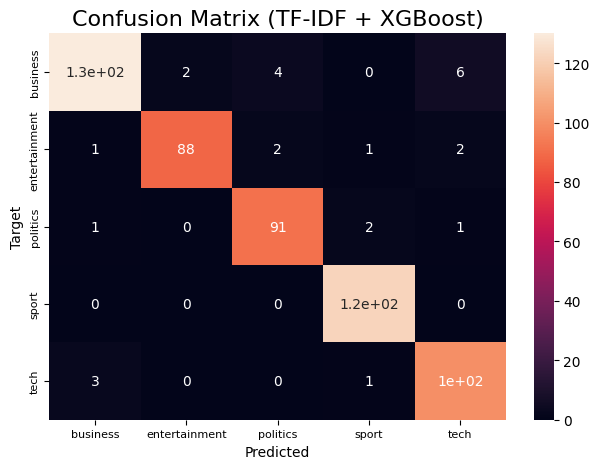

In [42]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test,xgb_test_preds,labels=xgb.classes_)

ax = sns.heatmap(cm,annot=True)
ax.set_title('Confusion Matrix (TF-IDF + XGBoost)',fontsize=16)
ax.xaxis.set_ticklabels(['business','entertainment','politics','sport','tech'],fontsize=8) 
ax.yaxis.set_ticklabels(['business','entertainment','politics','sport','tech'],fontsize=8) 
ax.set_xlabel("Predicted")
ax.set_ylabel("Target")

plt.tight_layout()

In [43]:
forest = RandomForestClassifier() 
forest = forest.fit(X_train3,y_train)

# Use the model to predict on train data
forest_train_preds = forest.predict(X_train3)

forest_train_results = get_test_scores('RendomForest (train)',forest_train_preds,y_train)
forest_train_results

,model,precision,recall,F1,accuracy
0,RendomForest (train),1.0,1.0,1.0,1.0


In [44]:
# Use the model to predict on test data
forest_test_preds = forest.predict(X_test3)

forest_test_results = get_test_scores('RendomForest (test)',forest_test_preds,y_test)
forest_test_results

,model,precision,recall,F1,accuracy
0,RendomForest (test),0.960587,0.957539,0.958873,0.958707


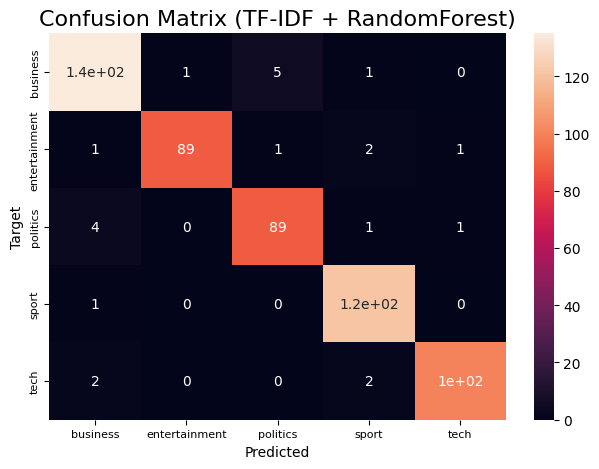

In [45]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test,forest_test_preds,labels=forest.classes_)

ax = sns.heatmap(cm,annot=True)
ax.set_title('Confusion Matrix (TF-IDF + RandomForest)',fontsize=16)
ax.xaxis.set_ticklabels(['business','entertainment','politics','sport','tech'],fontsize=8) 
ax.yaxis.set_ticklabels(['business','entertainment','politics','sport','tech'],fontsize=8) 
ax.set_xlabel("Predicted")
ax.set_ylabel("Target")

plt.tight_layout()

In [46]:
df2 = df.copy()
df2['targets'] = df2['labels'].astype("category").cat.codes

df2.head(2)

,text,labels,targets
0,"Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existing customers for high-speed broadband. TimeWarner also has to restate 2000 and 2003 results following a probe by the US Securities Exchange Commission (SEC), which is close to concluding.\n\nTime Warner's fourth quarter profits were slightly better than analysts' expectations. But its film division saw profits slump 27% to $284m, helped by box-office flops Alexander and Catwoman, a sharp contrast to year-earlier, when the third and final film in the Lord of the Rings trilogy boosted results. For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn. ""Our financial performance was strong, meeting or exceeding all of our full-year objectives and greatly enhancing our flexibility,"" chairman and chief executive Richard Parsons said. For 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins.\n\nTimeWarner is to restate its accounts as part of efforts to resolve an inquiry into AOL by US market regulators. It has already offered to pay $300m to settle charges, in a deal that is under review by the SEC. The company said it was unable to estimate the amount it needed to set aside for legal reserves, which it previously set at $500m. It intends to adjust the way it accounts for a deal with German music publisher Bertelsmann's purchase of a stake in AOL Europe, which it had reported as advertising revenue. It will now book the sale of its stake in AOL Europe as a loss on the value of that stake.",business,0
1,"Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.\n\nAnd Alan Greenspan highlighted the US government's willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 against the euro, from $1.2974 on Thursday. Market concerns about the deficit has hit the greenback in recent months. On Friday, Federal Reserve chairman Mr Greenspan's speech in London ahead of the meeting of G7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected US jobs data. ""I think the chairman's taking a much more sanguine view on the current account deficit than he's taken for some time,"" said Robert Sinche, head of currency strategy at Bank of America in New York. ""He's taking a longer-term view, laying out a set of conditions under which the current account deficit can improve this year and next.""\n\nWorries about the deficit concerns about China do, however, remain. China's currency remains pegged to the dollar and the US currency's sharp falls in recent months have therefore made Chinese export prices highly competitive. But calls for a shift in Beijing's policy have fallen on deaf ears, despite recent comment

In [47]:
# Number of target classes
K = df2['targets'].max() + 1
K

5

In [53]:
df_train0,df_test = train_test_split(df2,test_size=0.2)

In [52]:
df_train,df_valid = train_test_split(df_train0,test_size=0.2)

In [54]:
# Convert sentences to sequences
MAX_VOCAB_SIZE = 2000

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_VOCAB_SIZE)

tokenizer.fit_on_texts(df_train['text'])

sequences_train = tokenizer.texts_to_sequences(df_train['text'])
sequences_valid = tokenizer.texts_to_sequences(df_valid['text'])
sequences_test  = tokenizer.texts_to_sequences(df_test['text'])

In [55]:
# Get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 26432 unique tokens.


In [56]:
# Pad sequences to get a N x T matrix
data_train = tf.keras.preprocessing.sequence.pad_sequences(sequences_train)
print('Shape of data train tensor:',data_train.shape)

# get sequence length
T = data_train.shape[1]

Shape of data train tensor: (1424, 2438)


In [57]:
data_valid = tf.keras.preprocessing.sequence.pad_sequences(sequences_valid,maxlen=T)
print('Shape of data validation tensor:',data_valid.shape)

Shape of data validation tensor: (356, 2438)


In [60]:
data_test = tf.keras.preprocessing.sequence.pad_sequences(sequences_test,maxlen=T)
print('Shape of data test tensor:',data_test.shape)

Shape of data test tensor: (445, 2438)


In [61]:
# Create the model

# We get to choose embedding dimensionality
D = 50

i = tf.keras.layers.Input(shape=(T,))
x = tf.keras.layers.Embedding(V+1,D)(i)
x = tf.keras.layers.Conv1D(32,3,activation='relu')(x)
x = tf.keras.layers.GlobalMaxPooling1D()(x)
x = tf.keras.layers.Dense(K)(x)

model1 = tf.keras.models.Model(i,x)

In [62]:
# Compile and fit
model1.compile(
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy']
)

print('Training model...')
history1 = model1.fit(
  data_train,df_train['targets'],
  epochs=50,
  validation_data=(data_valid,df_valid['targets'])
)

Training model...
Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.3189 - loss: 1.5899 - val_accuracy: 0.5421 - val_loss: 1.4864
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6561 - loss: 1.3904 - val_accuracy: 0.8034 - val_loss: 1.1541
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8721 - loss: 0.9602 - val_accuracy: 0.8511 - val_loss: 0.7140
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.8953 - loss: 0.5508 - val_accuracy: 0.8876 - val_loss: 0.4538
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.9411 - loss: 0.3219 - val_accuracy: 0.9157 - val_loss: 0.3342
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9564 - loss: 0.2121 - val_accuracy: 0.9270 - val_loss: 0.2761
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.9750 - loss: 0.1485 - val_accuracy: 0.9354 - val_loss: 0.2383
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.9867 - loss: 0.1055 - val_ac

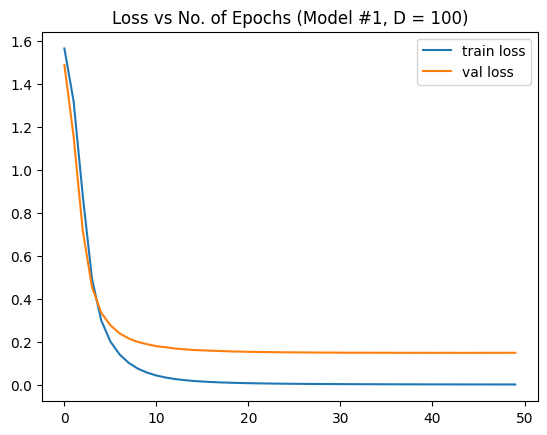

In [63]:
# Plot loss per iteration

plt.plot(history1.history['loss'],label='train loss')
plt.plot(history1.history['val_loss'],label='val loss')
plt.title('Loss vs No. of Epochs (Model #1, D = 100)')
plt.legend();

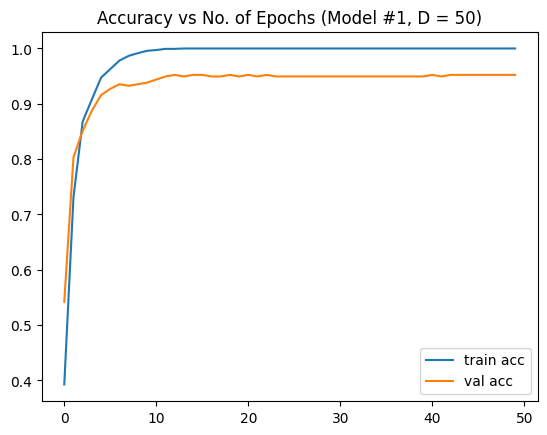

In [64]:
# Plot accuracy per iteration
plt.plot(history1.history['accuracy'],label='train acc')
plt.plot(history1.history['val_accuracy'],label='val acc')
plt.title('Accuracy vs No. of Epochs (Model #1, D = 50)')
plt.legend();

In [65]:
model1.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 2438)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 2438, 50)       │     1,321,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 2436, 32)       │         4,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 32)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,979,943 (15.18 MB)

 Trainable params: 1,326,647 (5.06 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,653,296 (10.12 MB)

In [66]:
score1 = model1.evaluate(data_test,df_test['targets'],verbose=0)
print('Test Loss: {:.4f}'.format(score1[0]))
print('Test Accuracy: {:.4f}'.format(score1[1]))

Test Loss: 0.0644
Test Accuracy: 0.9775


In [67]:
# Define the optimizer
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9,epsilon=1e-08,decay=0.0)

# Defining the learning rate reduction routine
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0000001)

In [68]:
# Defining the checkpoint callback
checkpoint_path = "results.weights.h5"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                      save_best_only=True,
                                      monitor='val_accuracy',
                                      mode='max',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_freq='epoch')

In [69]:
# Create the model

# We get to choose embedding dimensionality
D = 50

i = tf.keras.layers.Input(shape=(T,))
x = tf.keras.layers.Embedding(V+1,D)(i)
x = tf.keras.layers.Conv1D(64,3,activation='relu')(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dropout(0.5)(x) 
x = tf.keras.layers.Dense(K,activation='softmax')(x)

model2 = tf.keras.models.Model(i, x)

In [70]:
# Compile and fit
model2.compile(
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy']
)

print('Training model...')
history2 = model2.fit(
  data_train,df_train['targets'],
  epochs=50,
  validation_data=(data_valid,df_valid['targets']),
  callbacks=[learning_rate_reduction,checkpoint_callback]  
)

Training model...
Epoch 1/50
44/45 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.2168 - loss: 1.6158
Epoch 1: val_accuracy improved from -inf to 0.23034, saving model to results.weights.h5
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.2176 - loss: 1.6156 - val_accuracy: 0.2303 - val_loss: 1.5973 - learning_rate: 0.0010
Epoch 2/50
44/45 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.2344 - loss: 1.5980
Epoch 2: val_accuracy improved from 0.23034 to 0.23315, saving model to results.weights.h5
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.2353 - loss: 1.5976 - val_accuracy: 0.2331 - val_loss: 1.5612 - learning_rate: 0.0010
Epoch 3/50
44/45 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.3172 - loss: 1.5561
Epoch 3: val_accuracy improved from 0.23315 to 0.58427, saving model to results.weights.h5
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.3172 - loss: 1.5560 - val_accuracy: 0.5843 - val_loss: 1.5107 - learning_rate: 0.0010
Epoch 4/50
44/45 ━━━━━━━━━━━━━━━━━━━━

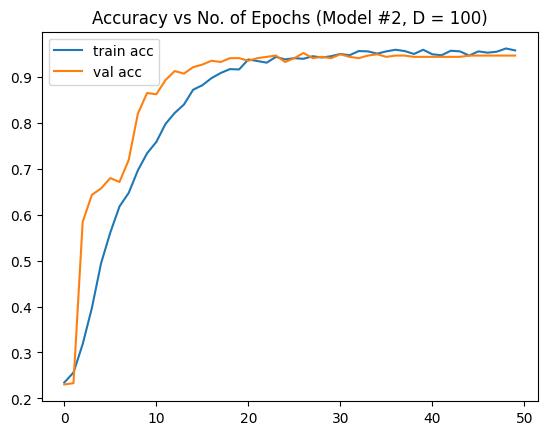

In [71]:
# Plot accuracy per iteration
plt.plot(history2.history['accuracy'],label='train acc')
plt.plot(history2.history['val_accuracy'],label='val acc')
plt.title('Accuracy vs No. of Epochs (Model #2, D = 100)')
plt.legend();

In [72]:
model2.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 2438)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 2438, 50)       │     1,321,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 2436, 64)       │         9,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,994,919 (15.24 MB)

 Trainable params: 1,331,639 (5.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,663,280 (10.16 MB)

In [73]:
score2 = model2.evaluate(data_test,df_test['targets'],verbose=0)
print('Test Loss: {:.4f}'.format(score2[0]))
print('Test Accuracy: {:.4f}'.format(score2[1]))

Test Loss: 0.1538
Test Accuracy: 0.9820


In [74]:
model2.load_weights(checkpoint_path)
loss,acc = model2.evaluate(data_test,df_test['targets'],verbose=0)

print('Restored model')
print('Test Loss: {:.4f}'.format(loss))
print('Test Accuracy: {:.4f}'.format(acc))

Restored model
Test Loss: 0.1838
Test Accuracy: 0.9775
